In [229]:
#1. Happy Birthday

#1.1
import random 

def generate_date(month,year):
    #create empty string return value
    date = ""
    
    #check if the month is two places or one so that we can add a 0 if necessary and add it to the string
    if month<10:
        date += '0'+str(month)+'/'
    else:
        date += str(month)+'/'
    
    #generate a random day based on the month
    if month in [1,3,5,7,10,12]: 
        day = random.randint(1,31)
    elif month in [4,6,8,9,11]:
        day = random.randint(1,30)
    else:
        day = 28
    
    #add a 0 to the day if necessary and add it to the string
    if day<10:
        date += '0'+str(day)+'/'
    else:
        date += str(day)+'/'
    
    #add the year to the string
    date += str(year)
    
    return date

#generate_date(1,2001)
        

In [263]:
#1.2

def check_match(dates):
    #initialize counter and empty list 
    count = 0
    twinsies = []
    
    #make sure we're only comparing months/days
    for i in range(len(dates)):
        #slice off the end (year)
        dates[i] = dates[i][:-5]
    print(dates)
    
    #process for adding the matching bdays using a while loop 
     while count < len(dates):
        #use pop to remove the date and return it as value
        check = dates.pop(count) 
        #check for other occurrences of popped date value: append it to bday match list and then remove occurrences to avoid reiteration
        if check in dates:
            twinsies.append(check)
            dates.remove(check)
        count += 1
        
    return (twinsies, len(twinsies))

In [265]:
#1.3 
def play_bday_match():
    
    #set game up based on user preference
    trials = int(input('How many trials would you like to run?'))
    bdays = int(input('How many birthdays would you like to generate?'))
    #
    trial_match=0
    
    for trial in range(trials): 
        bday_list=[]
        for bday in range(bdays):
            month = random.randint(1,12)
            year = random.randint(1000,2020)
            bday_list.append(generate_date(month, year))
        matches, num = check_match(bday_list)
        print('Trial:'+str(trial+1)+' '+ str(num)+" bday matches found")
        print(matches)
        if num > 0:
            trial_match += 1
    print(str((trial_match/ trials) * 100)+'% of trials had matches')

play_bday_match()
            
 

How many trials would you like to run?5
How many birthdays would you like to generate?23
['01/18', '10/10', '06/15', '05/16', '05/15', '11/25', '06/30', '02/28', '09/13', '01/01', '09/29', '05/04', '04/07', '03/01', '12/03', '03/27', '02/28', '11/01', '11/23', '06/29', '02/28', '05/19', '12/02']
Trial:1 1 bday matches found
['02/28']
['03/25', '05/03', '05/17', '12/22', '02/28', '04/22', '03/09', '01/13', '02/28', '01/21', '07/31', '02/28', '11/25', '06/15', '04/21', '12/29', '06/30', '02/28', '07/10', '07/07', '06/27', '05/10', '02/28']
Trial:2 2 bday matches found
['02/28', '02/28']
['04/20', '06/21', '01/04', '12/06', '04/17', '11/25', '04/27', '06/23', '06/05', '11/05', '11/18', '12/16', '08/09', '08/20', '09/16', '04/30', '02/28', '06/19', '11/09', '08/20', '04/21', '02/28', '08/08']
Trial:3 1 bday matches found
['02/28']
['06/24', '02/28', '01/14', '12/31', '09/06', '09/13', '06/05', '07/27', '03/03', '04/09', '12/14', '06/24', '04/14', '10/18', '09/25', '12/03', '02/28', '08/13'

Top 50 songs listened in 2019 on spotify

Source: Kaggle (https://www.kaggle.com/leonardopena/top50spotify2019)

In light of COVID-19 and having to be home with my family, there are few things that now bring me joy in a day and keep me going: food, sleep, TV, the sun, and music. As an active user, I thought it'd be interesting to look at the top 50 songs on Spotify from last year and see if there were any trends among highly popular song and whether there may be a formula to creating popular music (spoiler alert: yes).

It 50 rows and has 14 columns.

Some qUesTiOnS I have: 

a. What is the most common genre?

b. Which artist has the most hit songs?

c. What is is the most popular song format in terms of length, speechiness and ? 

In [54]:
#importing necessary packages 
import numpy as np
import pandas as pd
from scipy import stats

#load/read dataset into a variable that can be manipulated 
top50 = pd.read_csv('top50.csv', encoding = "ISO-8859-1")

#return the top 5 rows of dataset 
top50.head()




,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [10]:
#finding datatypes of columns
print(top50.dtypes)

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object


Generally, this dataset is pretty concise, however there are some columns that I want to add/change/remove.
    
Add

1. The average song length according to research is 3 min (180 sec). I want to see the variability of this and make a column called len.variance. If the song's length is > 200, it will say longer. If the length is < 160, it will say shorter. If it is within 160-180, it will say average.


3. I wasn't entirely sure what to make of "Speechiness". According to Spotify, whose standards are recorded in this dataset, "Speechiness" detects the presence of spoken words in a track which I think is an interesting piece of information and I want to track it under a new column called Word_Music_Ratio. For example, I like rap which often has a lot of words, but my friend likes EDM which often has less words. Spotify explains that values above 66 describe tracks that are probably made entirely of spoken words. Values between 33 and 66 describe tracks that may contain both music and speech, either in sections or layered. Values below 33 most likely represent music and other non-speech-like tracks. With this information, I noticed the numbers under 

Change

1. For my analysis of this dataset, I want to make some of the genres more general (perhaps this is reductionist, but honestly some of these genres are too specific for this somewhat small dataset so I want to zoom out a bit), specifically pop, rap, and hip hop. For example, whether it is canadian or australian pop, it will be classified to just pop. I want to do the same thing with rap and hip hop (e.g. dfw rap or candian rap will just become rap, and canadian hip hop will just become hip hop). I will still keep some genres of pop (e.g. dance pop) if I deem them to be unique.

Remove

1. I want to remove the last column 'Popularity'. It's unclear exactly how this dataset measures popularity with those numbers and I wasn't able to find anything from Spotify regarding that measurement. Besides, we're assuming these are the top 50 songs and I don't need to find the most popular within this list


In [61]:
#Process for changing values under Genre to be more general

#Set the column values equal to new values through parameters using regex and replace function
top50['Genre']=top50['Genre'].replace({"canadian pop": "pop", "dance pop": "pop", "australian pop": "pop","dfw rap": "rap", "canadian hip hop": "hip hop"}, regex=True)


In [66]:
#Process for making a column called len.variance

#Set conditions that will be used as parameters for values under 'Length.' column
len_conditions = [
    (top50['Length.'] > 200),
    (top50['Length.'] < 160 ),
    (top50['Length.'] >= 160) & (top50['Length.'] <= 200)]

#Set the possible values for 'len.variance' based off what conditions each value under 'Length.' meets
len_choices = ['Longer', 'Shorter', 'Average']

#Put together the conditions and choices with .select() to create new column 'len.variance'
top50['len.variance'] = np.select(len_conditions, len_choices, default='Null')


In [78]:
#Process for making a column called Word_Music_Ratio. These are basically the same steps I took with making len.variance

#Set conditions that will be used as parameters for values under 'Speechiness.' column
speech_conditions = [
    (top50['Speechiness.'] > 66),
    (top50['Speechiness.'] < 33 ),
    (top50['Speechiness.'] >= 33) & (top50['Speechiness.'] <= 66)]

#Set the possible values for 'Word_Music_Ratio' based off what conditions each value under 'Speechiness.' meets
speech_choices = ['Word Heavy', 'Even Words/Music', 'Music Heavy']

#Put together the conditions and choices with .select() to create new column 'Word_Music_Ratio'
top50['Word_Music_Ratio'] = np.select(speech_conditions,speech_choices, default='Null')


In [90]:
#Process for removing 'Popularity column'

#use drop, yay easy

top50.drop(columns = 'Popularity')

Dataset we have now

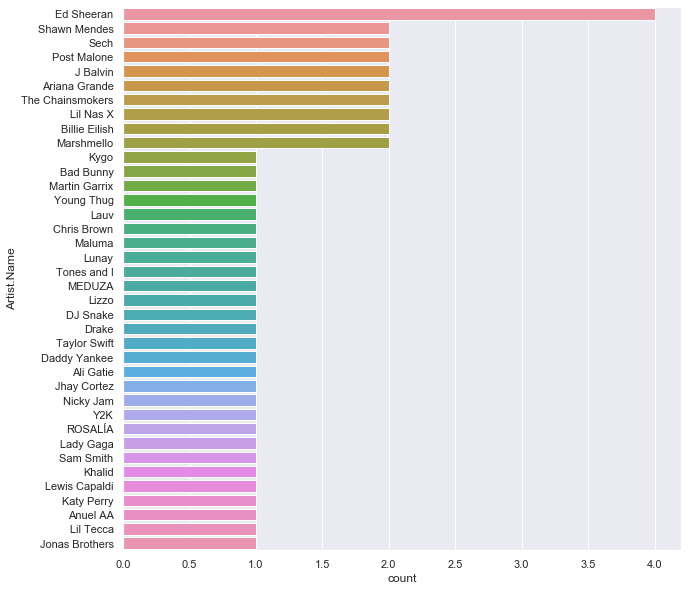

In [111]:
#Process for visualizing the artists and the number of songs they have on top 50

#import matplotlib - plotting library
import matplotlib.pyplot as plt
#import seaborn which can make the graph look prettier:D, it's a library built off matplotlib 
import seaborn as sns

#set size
plt.figure(figsize=(10,10))

#code out the graph which will have Artist Name as the y - axis title
#using countplot gives me a histogram across a categorical variable
sns.countplot(y='Artist Name', data=top50, order=top50["Artist.Name"].value_counts().index)
plt.show()



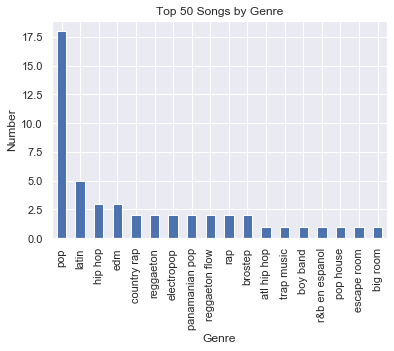

In [115]:
#Process for Visualizing the Top Songs by Genre

#Make a bar graph using matplotlib
top50['Genre'].value_counts().plot.bar()

#Give the graph a title
plt.title('Top 50 Songs by Genre')

#Label the x and y-axis
plt.ylabel('Number')
plt.xlabel('Genre')
plt.show()

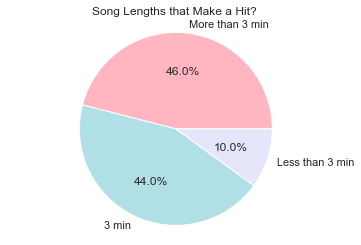

In [160]:
#Show correlation between song length and popularity

#create a variable filled with frequency of values from 'len.variance' column that I created
song_length = top50['len.variance'].value_counts()

#make labels
my_labels = 'More than 3 min','3 min','Less than 3 min'
#choose colors
my_colors = ['lightpink','powderblue','lavender']
#put it all together and make yourself a pie 
plt.pie(song_length,labels = my_labels,autopct = '%1.1f%%', colors = my_colors)
plt.title('Song Lengths that Make a Hit?')
plt.axis('equal')
plt.show()




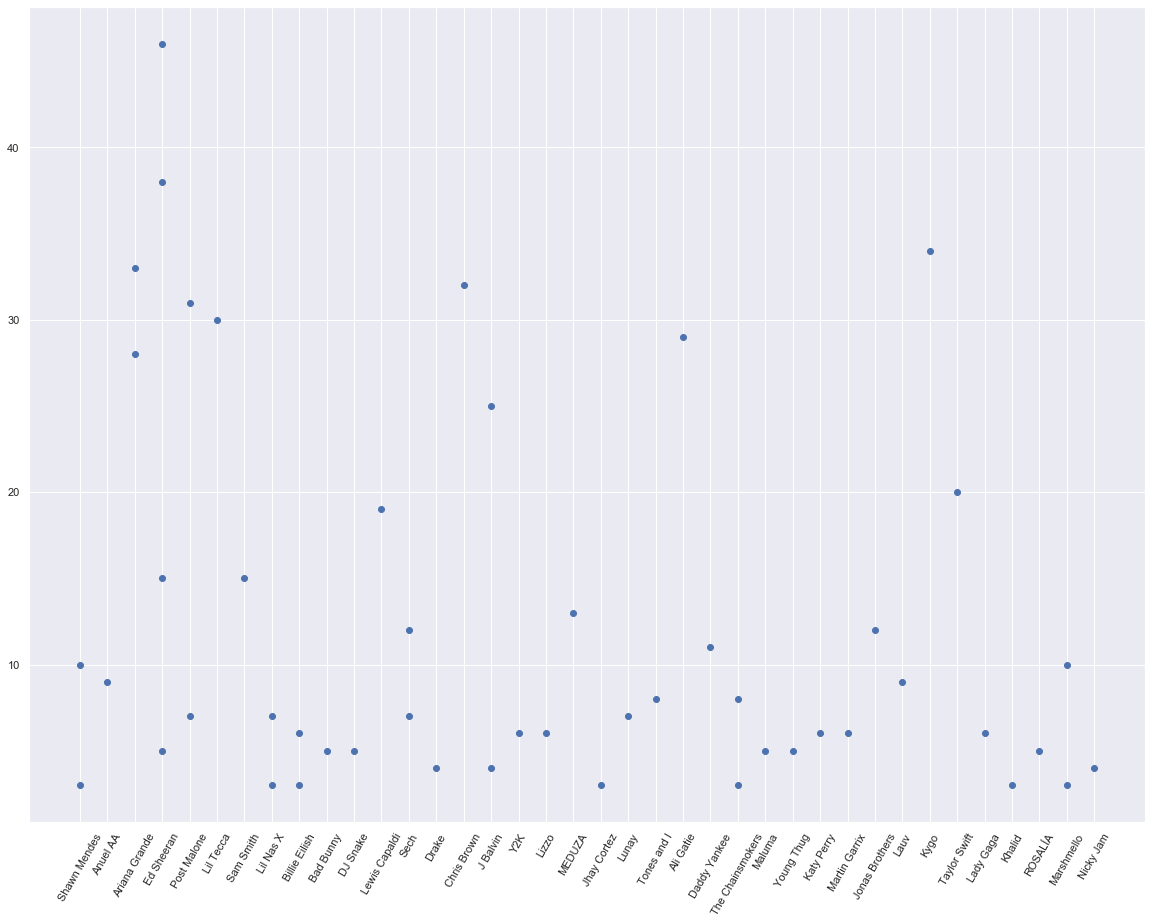

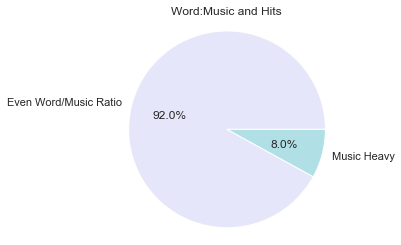

In [216]:
#Looking at Speechiness in two ways

#Create scatterplot showing artists, their songs, and speechiness in their songs. 
#set size
plt.figure(figsize=(20, 15))
#set x and y
x = top50['Artist.Name']
y = top50.groupby(['Artist.Name','Track.Name'])['Speechiness.'].mean()
#rotate the xticks so that the labels don't overlap
plt.xticks(rotation=60)

#plot
plt.scatter(x, y)
plt.show()

#Make a Pie Chart using the Word_Music_Ratio column I created to paint a more general picture
#Similar(basically the same)process we used to make the pie chart above
ratio = top50['Word_Music_Ratio'].value_counts()

#make labels
ratio_labels = 'Even Word/Music Ratio','Music Heavy'
#choose colors
ratio_colors = ['lavender','powderblue']
#put it all together and make a pie 
plt.pie(ratio,labels = ratio_labels,autopct = '%1.1f%%', colors = ratio_colors )
plt.title('Word:Music and Hits')
plt.axis('equal')
plt.show()

